In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn

from sklearn.preprocessing import LabelEncoder, StandardScaler

Dataset Attributes¶

Age : age of the patient [years]\
Sex : sex of the patient [M: Male, F: Female]\
ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\
RestingBP : resting blood pressure [mm Hg]\
Cholesterol : serum cholesterol [mm/dl]\
FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\
RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\
MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]\
ExerciseAngina : exercise-induced angina [Y: Yes, N: No]\
Oldpeak : oldpeak = ST [Numeric value measured in depression]\
ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]\
HeartDisease : output class [1: heart disease, 0: Normal]


In [2]:
dataset = pd.read_csv("datasets/heart.csv")

In [3]:
df = dataset.copy()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
print("Sex", df["Sex"].unique()) 
print("ChestPain",df["ChestPainType"].unique())
print("FastingBS", df["FastingBS"].unique())
print("Angina",df["ExerciseAngina"].unique())
print("ST Slope", df["ST_Slope"].unique())
print("RestingECG", df["RestingECG"].unique())

Sex ['M' 'F']
ChestPain ['ATA' 'NAP' 'ASY' 'TA']
FastingBS [0 1]
Angina ['N' 'Y']
ST Slope ['Up' 'Flat' 'Down']
RestingECG ['Normal' 'ST' 'LVH']


In [7]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
df = pd.get_dummies(df, columns=['ChestPainType'], prefix='ChestPainType')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,False,True,False,False
1,49,0,160,180,0,Normal,156,N,1.0,Flat,1,False,False,True,False
2,37,1,130,283,0,ST,98,N,0.0,Up,0,False,True,False,False
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,True,False,False,False
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,N,1.2,Flat,1,False,False,False,True
914,68,1,144,193,1,Normal,141,N,3.4,Flat,1,True,False,False,False
915,57,1,130,131,0,Normal,115,Y,1.2,Flat,1,True,False,False,False
916,57,0,130,236,0,LVH,174,N,0.0,Flat,1,False,True,False,False


In [9]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,0,0.0,Up,0,False,True,False,False
1,49,0,160,180,0,Normal,156,0,1.0,Flat,1,False,False,True,False
2,37,1,130,283,0,ST,98,0,0.0,Up,0,False,True,False,False
3,48,0,138,214,0,Normal,108,1,1.5,Flat,1,True,False,False,False
4,54,1,150,195,0,Normal,122,0,0.0,Up,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,0,1.2,Flat,1,False,False,False,True
914,68,1,144,193,1,Normal,141,0,3.4,Flat,1,True,False,False,False
915,57,1,130,131,0,Normal,115,1,1.2,Flat,1,True,False,False,False
916,57,0,130,236,0,LVH,174,0,0.0,Flat,1,False,True,False,False


In [10]:
df = pd.get_dummies(df, columns=['ST_Slope'], prefix='ST_Slope')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,Normal,172,0,0.0,0,False,True,False,False,False,False,True
1,49,0,160,180,0,Normal,156,0,1.0,1,False,False,True,False,False,True,False
2,37,1,130,283,0,ST,98,0,0.0,0,False,True,False,False,False,False,True
3,48,0,138,214,0,Normal,108,1,1.5,1,True,False,False,False,False,True,False
4,54,1,150,195,0,Normal,122,0,0.0,0,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,0,1.2,1,False,False,False,True,False,True,False
914,68,1,144,193,1,Normal,141,0,3.4,1,True,False,False,False,False,True,False
915,57,1,130,131,0,Normal,115,1,1.2,1,True,False,False,False,False,True,False
916,57,0,130,236,0,LVH,174,0,0.0,1,False,True,False,False,False,True,False


In [11]:
df = pd.get_dummies(df, columns=['RestingECG'], prefix='RestingECG')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,False,True,False,True,False
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,1,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,1,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,1,False,True,False,False,False,True,False,True,False,False


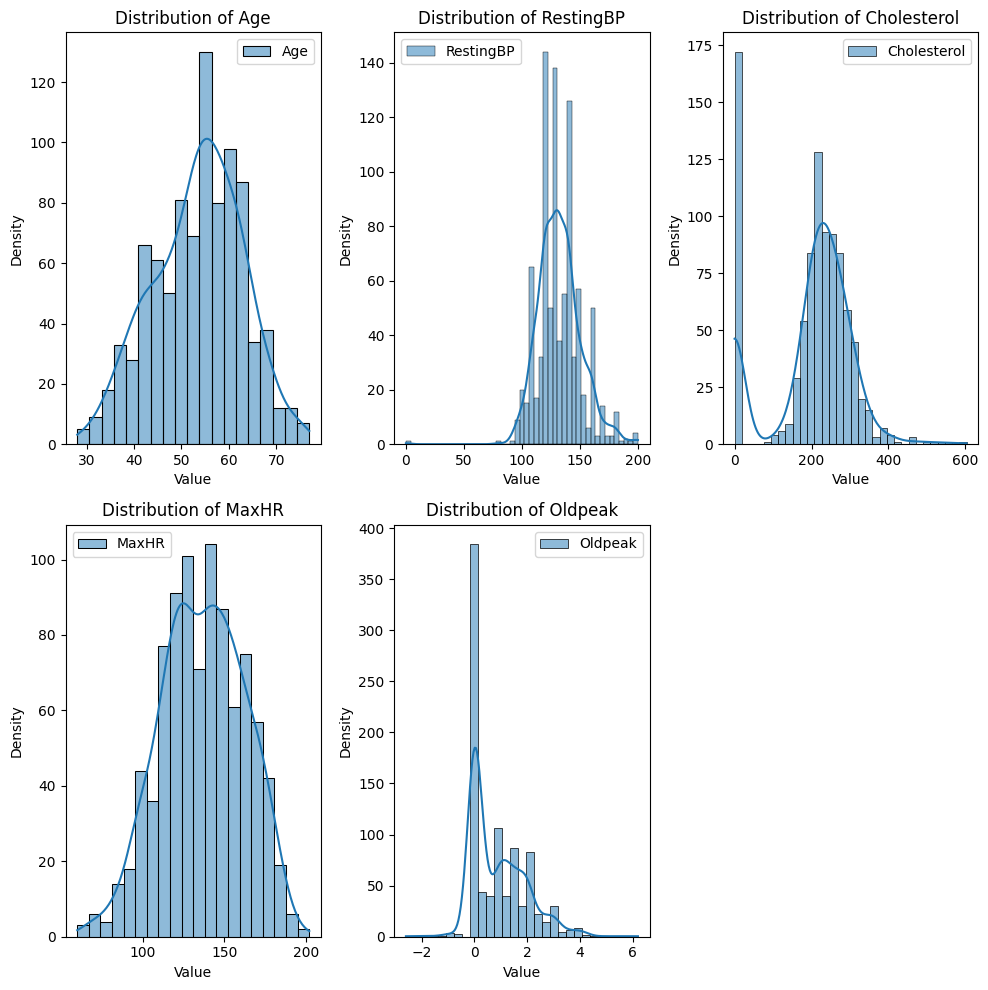

In [12]:
def plot_distributions(df: pd.DataFrame, numeric_cols: list):

    num_plots = len(numeric_cols)
    cols = 3
    rows = (num_plots // cols) + (num_plots % cols > 0)  
    
    plt.figure(figsize=(10, 5 * rows))  
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], label=col, fill=True, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
plot_distributions(df,features)

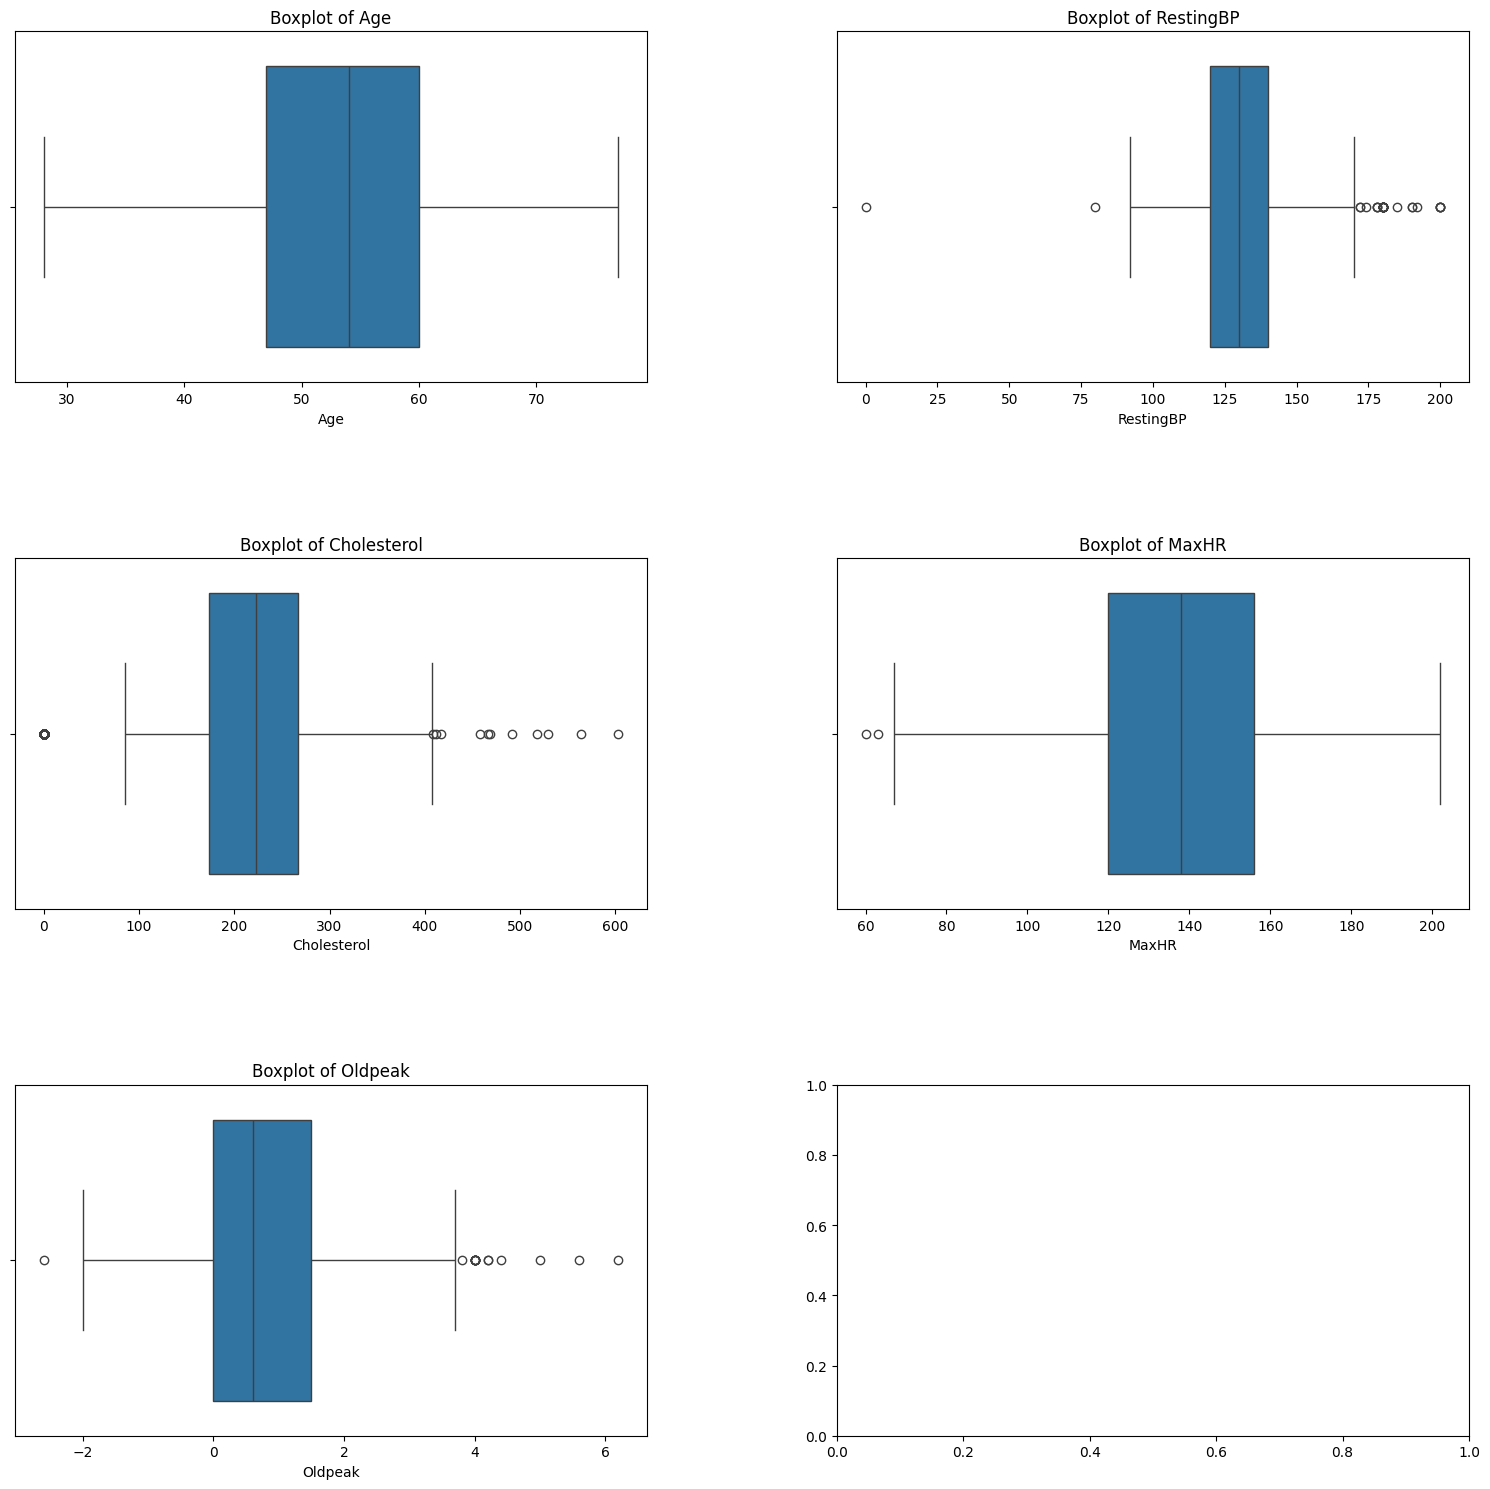

In [13]:
def plot_boxplots(df: pd.DataFrame, numeric_cols: list):

    num_plots = len(numeric_cols)
    cols = 2  # Grafikler 2 sütunda yerleştirilecek
    rows = (num_plots // cols) + (num_plots % cols > 0)  # Gerekirse yeni satır eklenir
    
    # Grafik boyutlarını ayarlayın
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Subplotları düzleştirir
    
    # Her bir numeric kolonu için boxplot çizin
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel(col)
    
    # Subplotlar arasında düzenleme yapmak için
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Genişlik ve yükseklik ayarları
    plt.show()
features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
plot_boxplots(df,features)

In [14]:
df = df[df['Cholesterol'] != 0] 
# cholesterol value cannot be zero, values that are zero are either missing or entered incorrectly, so we removed them from the dataset

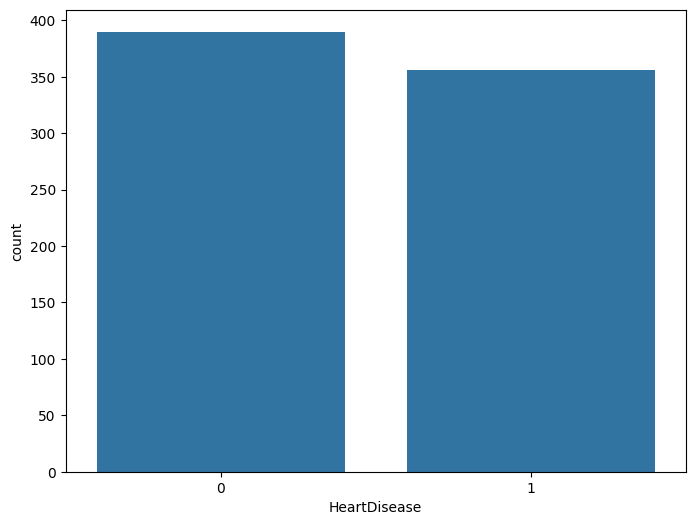

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="HeartDisease")
plt.show()


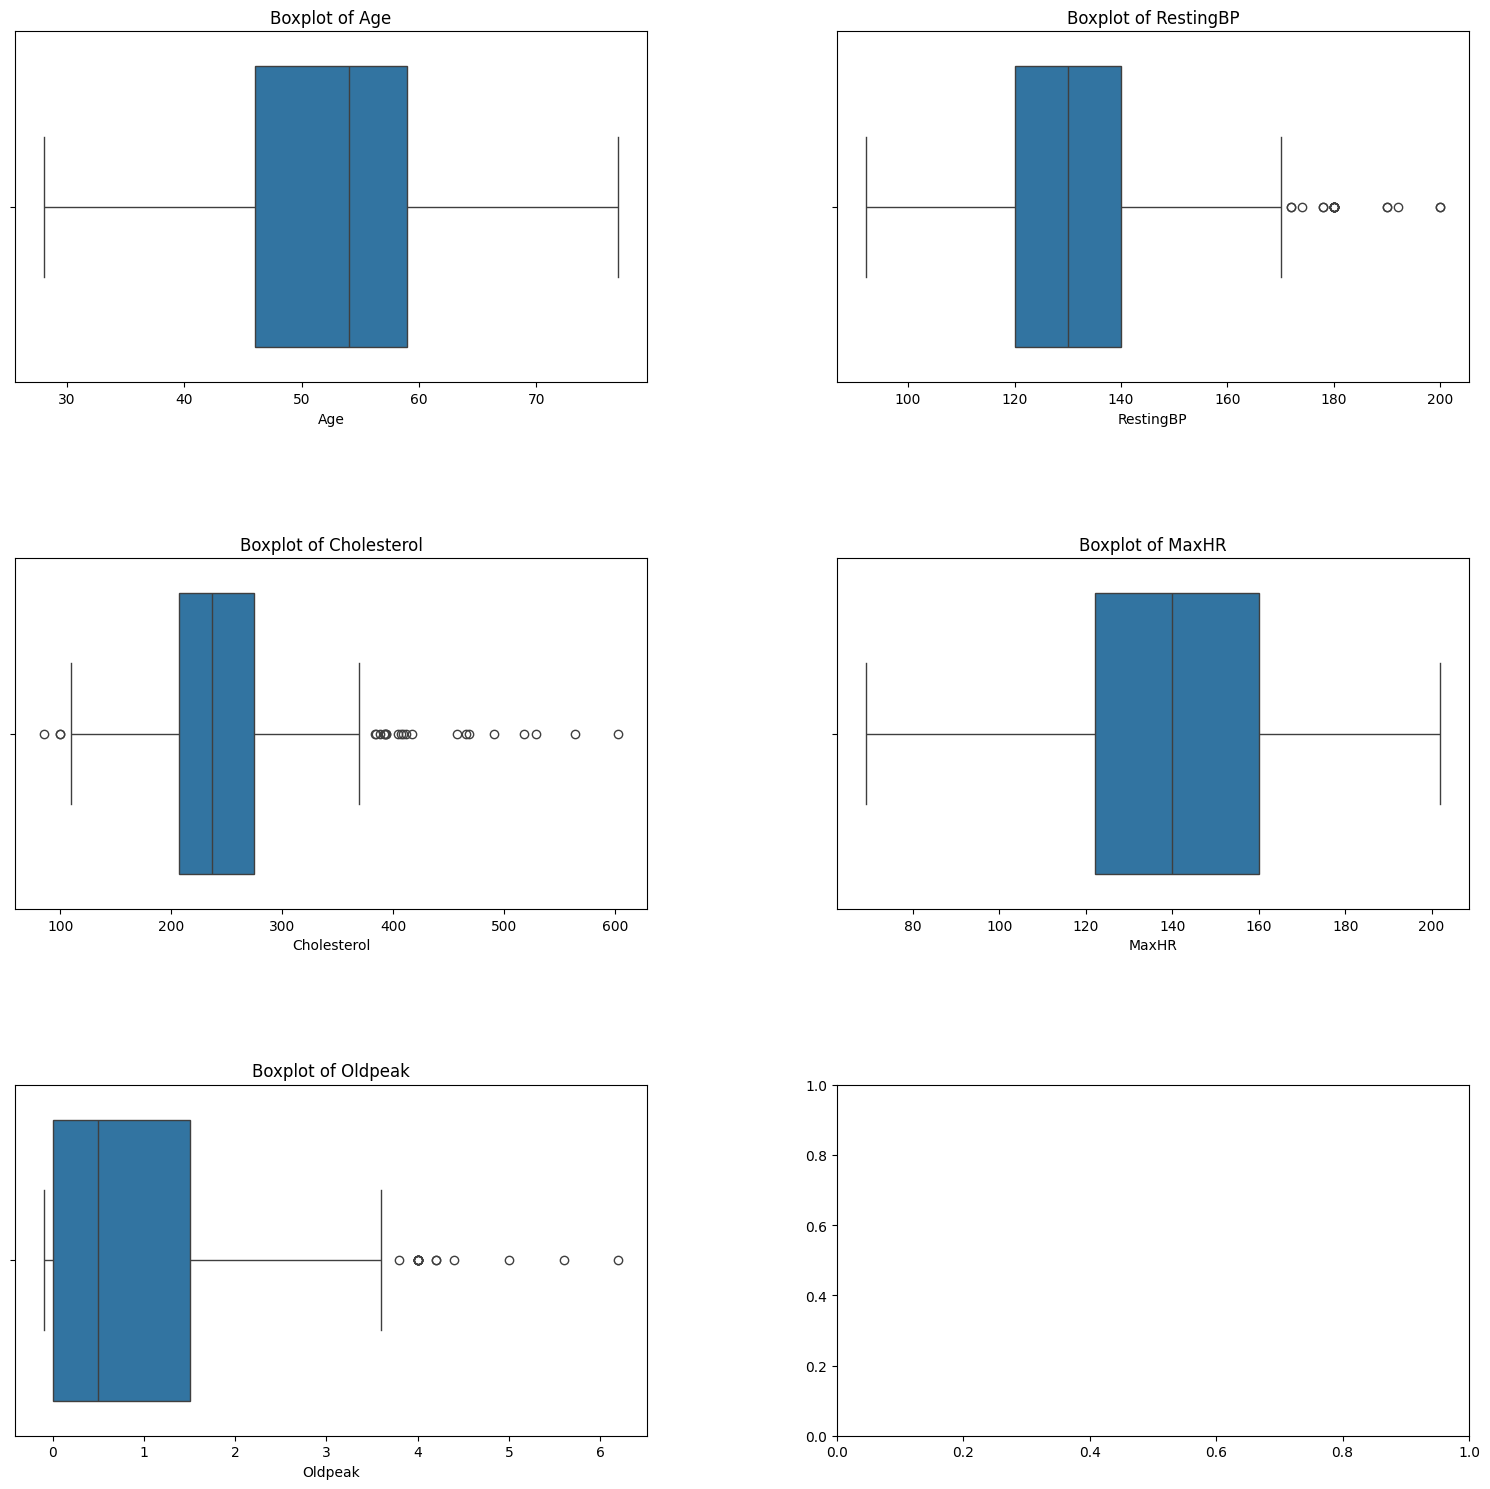

In [16]:
plot_boxplots(df,features)

In [17]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,False,True,False,True,False
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,1,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,1,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,1,False,True,False,False,False,True,False,True,False,False


In [18]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [19]:
model = XGBClassifier()

In [20]:
X = df.drop("HeartDisease", axis = 1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

In [21]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred = model.predict(X_test)

In [23]:
print(accuracy_score(y_test, y_pred))

0.8866666666666667


In [24]:
def model_evaluation(classifier):
    
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = "grey",fmt ='')
    
    print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        71
           1       0.94      0.84      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



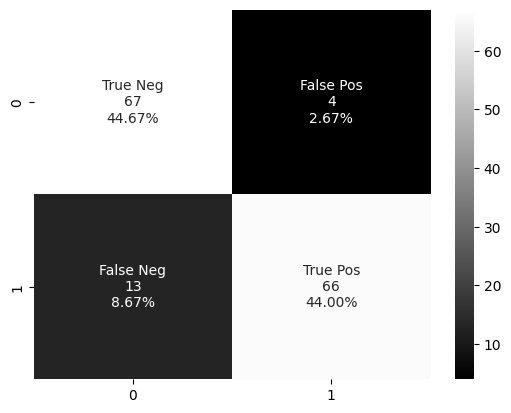

In [25]:
model_evaluation(model)

<Figure size 1200x1200 with 0 Axes>

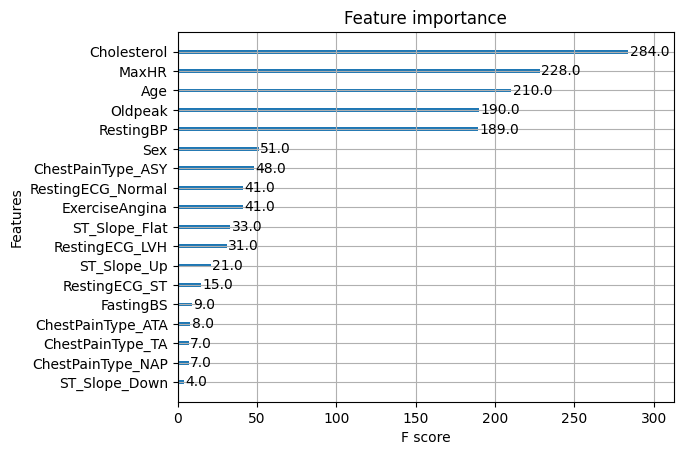

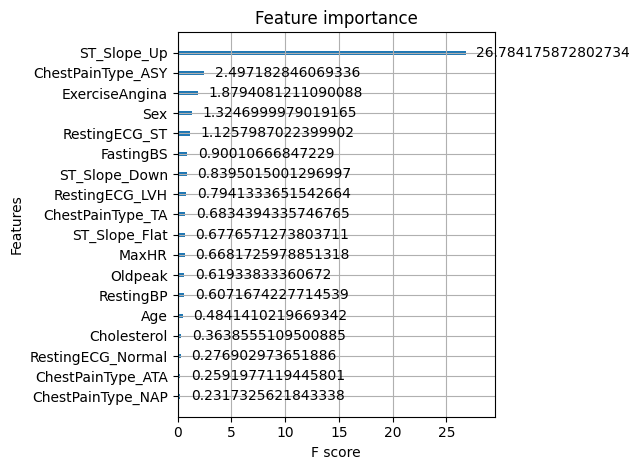

In [26]:
plt.figure(figsize=(12, 12))  

plot_importance(model, importance_type='weight')

plot_importance(model, importance_type='gain')

plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open('models/model_xgb.pkl', 'wb') as f:
    pickle.dump(model, f)